In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import sys
from pathlib import Path

# Add the root directory of the project to the Python path of the notebook's session
project_root = Path.cwd().parent  # Assuming the notebook is in the "notebooks" folder
sys.path.append(str(project_root))

# Import the DataExtractor class
from src.DataExtraction.DataExtractor import DataExtractor

## Load Data

In [5]:
data_extractor = DataExtractor(data_directory="data")

data_extractor.load_data(dog_ids=["Dog_1"])

Loaded data for 1 dog(s)
  - Interictal segments: 480
  - Preictal segments: 24
  - Test segments: 502


In [30]:
interictal_training = data_extractor.data["interictal"]
preictal_training = data_extractor.data["preictal"]
test_data = data_extractor.data["test"]

## Dataset Composition

In [37]:
sample_interictal_training = interictal_training[0]
sample_preictal_training = preictal_training[0]
sample_test_data = test_data[0]

metadata_samples = [sample_preictal_training, sample_interictal_training, sample_test_data]
samples_type = ["Preictal", "Interictal", "Test"]

metadata_dict = {"Sampling Frequency (Hz)": [], "Duration of each Segment (s)": [], "Number of Channels": []}
for sample in metadata_samples:
    metadata_dict["Sampling Frequency (Hz)"].append(round(sample["sampling_frequency"], 2))
    metadata_dict["Duration of each Segment (s)"].append(sample["data_length"])
    metadata_dict["Number of Channels"].append(len(sample["channels"]))

metadata_df = pd.DataFrame(metadata_dict, index=[samples_type])
metadata_df

,Sampling Frequency (Hz),Duration of each Segment (s),Number of Channels
Preictal,399.61,600,16
Interictal,399.61,600,16
Test,399.61,600,16


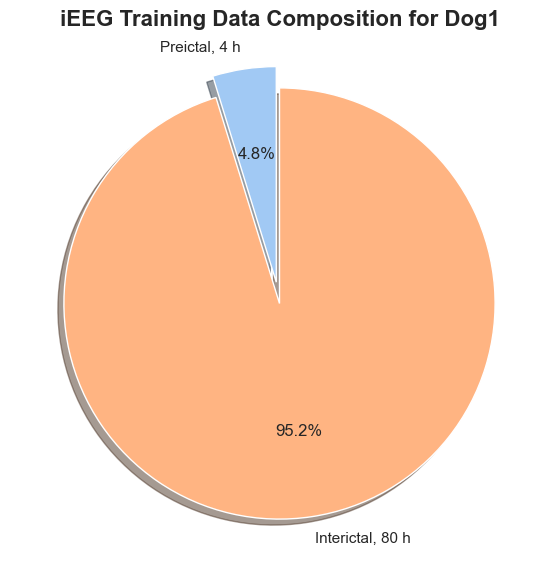

In [29]:
total_time_preictal = sum([int(preictal_segment["data_length"]) for preictal_segment in preictal_training])
total_time_interictal = sum([int(interictal_segment["data_length"]) for interictal_segment in interictal_training])

# Convert times in seconds to hours
preictal_hours = total_time_preictal / 3600 
interictal_hours = total_time_interictal / 3600

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Data for the pie chart
labels = ['Preictal', 'Interictal']
times = [total_time_preictal, total_time_interictal]
hours = [preictal_hours, interictal_hours]

# Combine labels with percentages and times in hours
label_with_details = [
    f"{label}, {time:.0f} h" 
    for label, time in zip(labels, hours)
]

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    times,
    labels=label_with_details,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")[:len(labels)],  # Use Seaborn pastel palette
    explode=(0.1, 0),  # Slightly separate the preictal sector
    shadow=True
)

plt.title('iEEG Training Data Composition for Dog1', fontsize=16, weight='bold')
plt.show()

## Analysis of iEEG Signals 

In [42]:
[preictal_color, interictal_color] = sns.color_palette("pastel")[:len(labels)]

Text(0.5, 0.98, 'iEEG Signals Segment 1 Training Dataset')

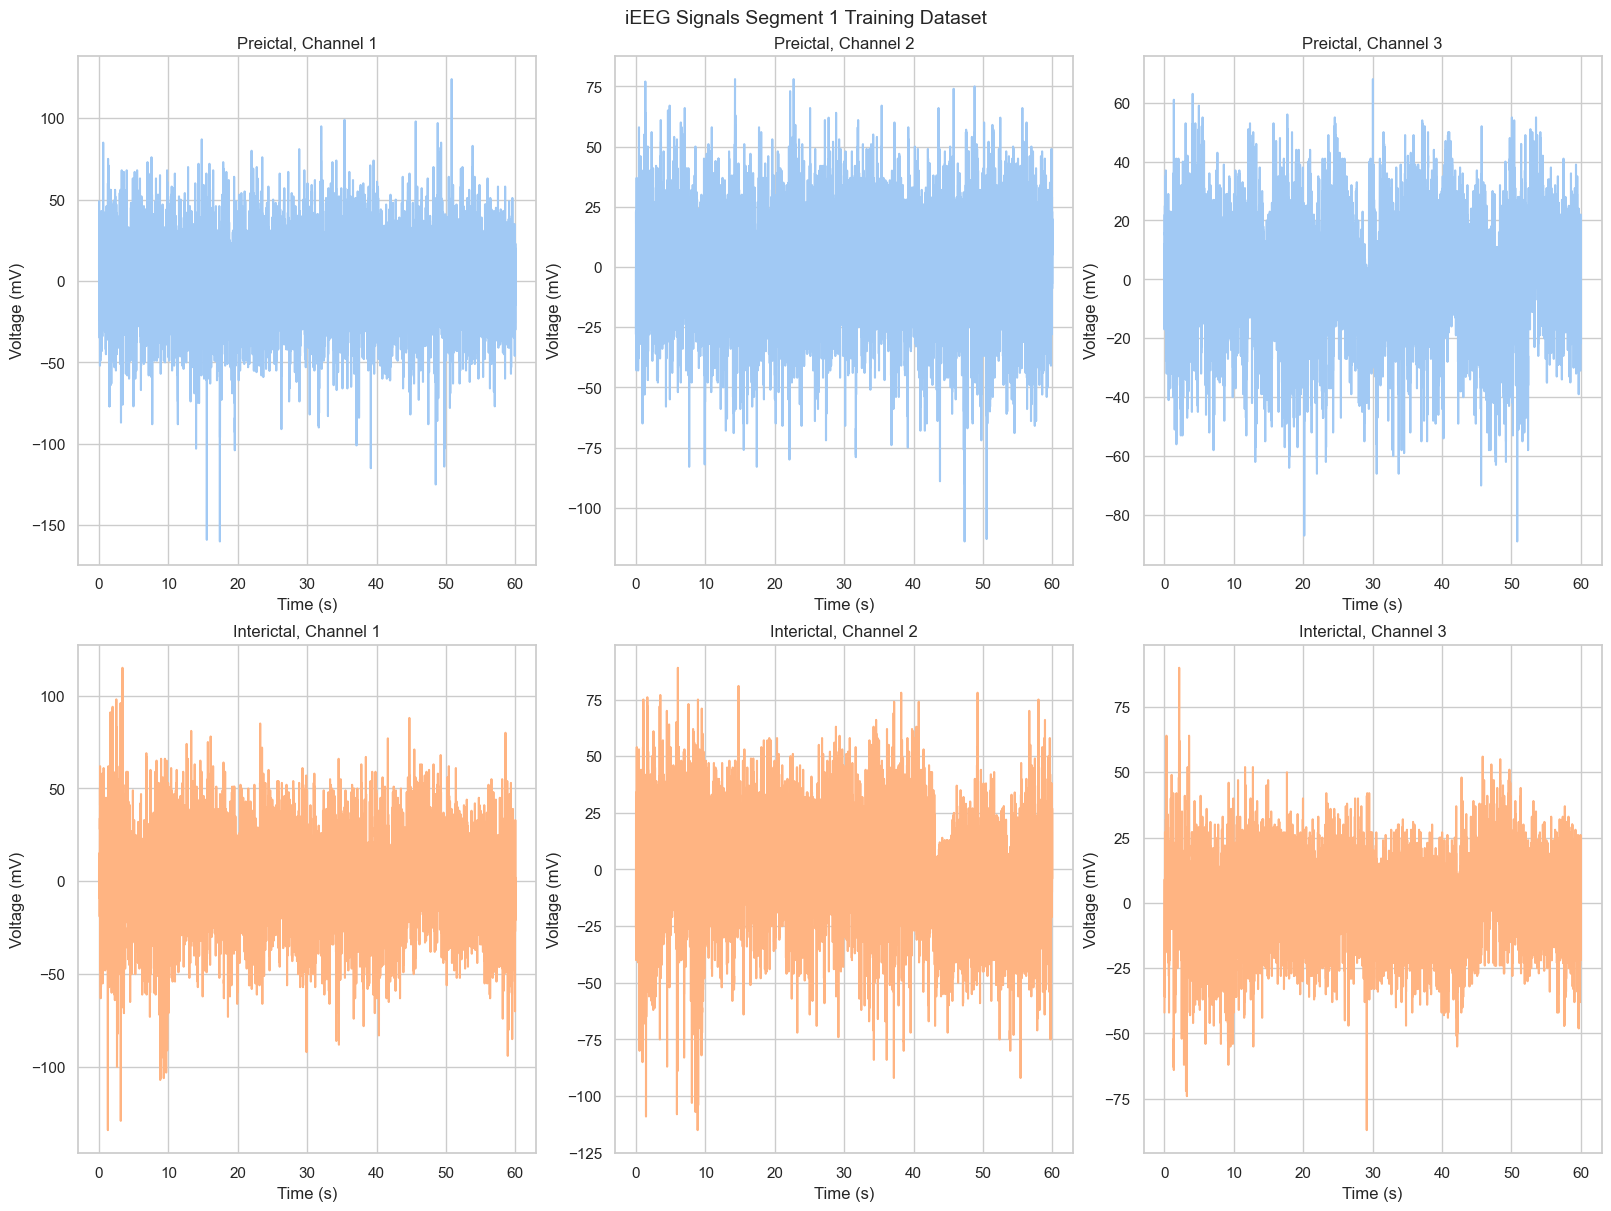

In [72]:
segment_to_plot = 1
channels_to_plot = [1, 2, 3]

sampling_freq = preictal_training[segment_to_plot - 1]["sampling_frequency"]

time_window = 60
samples_window = round(sampling_freq * time_window)

time = range(samples_window) / sampling_freq

fig, axes = plt.subplots(2, len(channels_to_plot), figsize=(16, 12), constrained_layout=True)

for idx, channel in enumerate(channels_to_plot):
    preictal_training_seg_example = preictal_training[segment_to_plot - 1]["eeg_data"][channel - 1, 0:samples_window]
    interictal_training_seg_example = interictal_training[segment_to_plot - 1]["eeg_data"][channel - 1, 0:samples_window]

    sns.lineplot(x=time, y=preictal_training_seg_example, ax=axes[0][idx], color=preictal_color)
    sns.lineplot(x=time, y=interictal_training_seg_example, ax=axes[1][idx], color=interictal_color)
    
    axes[0][idx].set_title(f"Preictal, Channel {channel}")
    axes[1][idx].set_title(f"Interictal, Channel {channel}")

    axes[0][idx].set_ylabel("Voltage (mV)")
    axes[1][idx].set_ylabel("Voltage (mV)")

    axes[0][idx].set_xlabel("Time (s)")
    axes[1][idx].set_xlabel("Time (s)")

fig.suptitle(f"iEEG Signals Segment {segment_to_plot} Training Dataset", fontsize=14)


In [ ]:
max_voltage_per_channel_preictal = [np.max(segment["eeg_data"], axis=1) for segment in preictal_training]
min_voltage_per_channel_preictal = [np.min(segment["eeg_data"], axis=1) for segment in preictal_training]
mean_voltage_per_channel_preictal = [np.mean(segment["eeg_data"], axis=1) for segment in preictal_training]
std_voltage_per_channel_preictal = [np.std(segment["eeg_data"], axis=1) for segment in preictal_training]

max_voltage_per_channel_interictal = [np.max(segment["eeg_data"], axis=1) for segment in interictal_training]
min_voltage_per_channel_interictal = [np.min(segment["eeg_data"], axis=1) for segment in interictal_training]
mean_voltage_per_channel_interictal = [np.mean(segment["eeg_data"], axis=1) for segment in interictal_training]
std_voltage_per_channel_interictal = [np.std(segment["eeg_data"], axis=1) for segment in interictal_training]

In [83]:
num_channels = len(max_voltage_per_channel_preictal[0])

# Preictal
max_preictal_df = pd.DataFrame(max_voltage_per_channel_preictal,
             columns=[f" Max Ch{x + 1}" for x in range(num_channels)])

min_preictal_df = pd.DataFrame(min_voltage_per_channel_preictal,
             columns=[f" Min Ch{x + 1}" for x in range(num_channels)])

mean_preictal_df = pd.DataFrame(mean_voltage_per_channel_preictal,
             columns=[f" Mean Ch{x + 1}" for x in range(num_channels)])

std_preictal_df = pd.DataFrame(std_voltage_per_channel_preictal,
             columns=[f"Std Ch{x + 1}" for x in range(num_channels)])

# Interictal
max_interictal_df = pd.DataFrame(max_voltage_per_channel_interictal,
             columns=[f" Max Ch{x + 1}" for x in range(num_channels)])

min_interictal_df = pd.DataFrame(min_voltage_per_channel_interictal,
             columns=[f" Min Ch{x + 1}" for x in range(num_channels)])

mean_interictal_df = pd.DataFrame(mean_voltage_per_channel_interictal,
             columns=[f" Mean Ch{x + 1}" for x in range(num_channels)])

std_interictal_df = pd.DataFrame(std_voltage_per_channel_interictal,
             columns=[f"Std Ch{x + 1}" for x in range(num_channels)])

In [85]:
mean_std_preictal_s = std_preictal_df.mean()
mean_std_interictal_s = std_interictal_df.mean()

# Create a new DataFrame for comparison
std_comparison_df = pd.DataFrame({
    "Preictal": mean_std_preictal_s,
    "Interictal": mean_std_interictal_s
})

std_comparison_df

,Preictal,Interictal
Std Ch1,-0.069615,-0.041056
Std Ch2,-0.054715,0.028514
Std Ch3,0.054473,0.082883
Std Ch4,-0.094792,0.048013
Std Ch5,-0.074981,-0.024084
Std Ch6,-0.240851,-0.079559
Std Ch7,-0.150365,-0.096165
Std Ch8,-0.052238,-0.016355
Std Ch9,0.041496,-0.024808
Std Ch10,0.208565,0.083427


In [ ]:
mean_avg_preictal_s = mean_preictal_df.mean()
mean_avg_interictal_s = mean_interictal_df.mean()

# Create a new DataFrame for comparison
avg_comparison_df = pd.DataFrame({
    "Preictal": mean_avg_preictal_s,
    "Interictal": mean_avg_interictal_s
})

In [ ]:
mean_std_preictal_s = std_preictal_df.mean()
mean_std_interictal_s = std_interictal_df.mean()

# Create a new DataFrame for comparison
std_comparison_df = pd.DataFrame({
    "Preictal": mean_std_preictal_s,
    "Interictal": mean_std_interictal_s
})

In [ ]:
mean_std_preictal_s = std_preictal_df.mean()
mean_std_interictal_s = std_interictal_df.mean()

# Create a new DataFrame for comparison
std_comparison_df = pd.DataFrame({
    "Preictal": mean_std_preictal_s,
    "Interictal": mean_std_interictal_s
})